In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_Linear_fit_period_This_work.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined_Boyd.out
2022_Feb_week4_new_ephemeris_LTT_fit.jpg
2022_Feb_week4_new_ephemeris_LTT_fit_Beuermann_2011.jpg
DPLeo.txt
DP_Leo_LTT_fit.ipynb
DP_Leo_LTT_fit_Beuermann_2011.ipynb
DP_Leo_LTT_fit_Beuermann_2011_Res.jpg
DP_Leo_LTT_fit_Boyd.ipynb
DP_Leo_LTT_fit_Boyd_Res.jpg
DP_Leo_LTT_fit_Demo.ipynb
DP_Leo_LTT_fit_Demo.jpg
DP_Leo_LTT_fit_Demo1.ipynb
DP_Leo_LTT_fit_Demo1.jpg
DP_Leo_LTT_fit_Demo1_Res.jpg
DP_Leo_LTT_fit_Demo2.ipynb
DP_Leo_LTT_fit_Demo3.ipynb
DP_Leo_LTT_fit_Demo_Beuermann_2011.ipynb
DP_Leo_LTT_fit_Demo_Res.jpg
DP_Leo_LTT_fit_Res.jpg
DP_Leo_LTT_fit_weighted_data.ipynb
DP_Leo_LTT_fit_weighted_data.jpg
DP_Leo_LTT_

In [3]:
DP_Leo = open("2022_Feb_week4_Linear_fit_period_This_work.dat",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Linear_fit_period_This_work.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#New ephemeris
T0_bjd = 2448773.2148464173
T0_bjd_err = 2.9564294265740673e-09
P0_day = 0.062362845525219396
P0_day_err = 2.6193240365559364e-19

#B
#T0_bjd = 2448773.21461
#T0_bjd_err = 0.00009
#P0_day = 0.0623628426
#P0_day_err = 0.0000000006

#S
#T0_bjd = 2448773.215071
#T0_bjd_err = 0.000018
#P0_day = 0.06236283691
#P0_day_err = 0.00000000070

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
#    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err


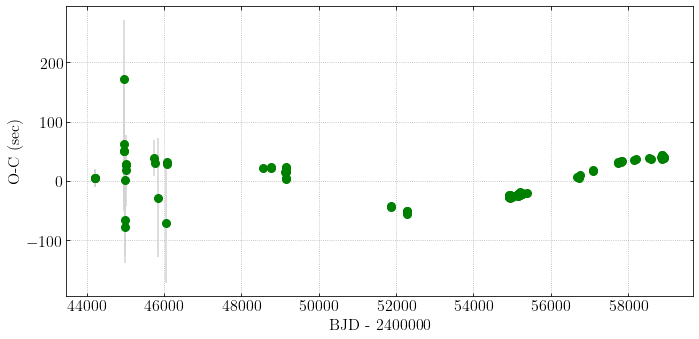

In [7]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_OC_diagram.out'
Data   = np.genfromtxt(Input)

N_BMJD = 2400000
BJD_time = Data[:,0] - N_BMJD
Cycle = Data[:,1]
T_O_linear = Data[:,2]
T_C_linear = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N_BMJD))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [8]:
#Read data ---#1
Input = "2022_Feb_week4_OC_diagram.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0] - N_BMJD
Epoch = Data[:,1]
OC = Data[:,4]
OC_err = Data[:,5]

In [9]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [10]:
m = 0
c = 0
K = 33.7        #m/s
b = 0.0005
w = -3.05           #rad

P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025     #days

In [11]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [12]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [13]:
def keplerian_fit(t,m,c,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    return m*x + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [14]:
import scipy.optimize as optimization  
guess = (m,c,K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(keplerian_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

m = params[0]
c = params[1]
K = params[2]
P = params[3]
e = params[4]
w = params[5]
tau = params[6]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
dP = params_covariance[3,3]
de = params_covariance[4,4]
dw = params_covariance[5,5]
dtau = params_covariance[6,6]


ocfit = keplerian_fit(x,m,c,K,P,e,w,tau)
#print(ocfit)


if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
#    print(K,P,e,w,w_deg,tau)


#Semi-major axis calculation
P_yr = P/365.25              # period in years
a_au = (P_yr**2)**(1./3)     # semi-major axis in au
#print(a_au)
da_au =np.sqrt((2*dP/(3*P))**2)*a_au
#print(da_au)

#Semi-amplitude calculation
K_auyr = K*2.1096256684e-4
#print(K_auyr)
    
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(2*P_yr)**(1/3)
mp_mjup = mp*1047.59421
#print(mp_mjup)
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP/(3*P))**2 + (e*de/np.sqrt(1-e*e))**2 )
#print(dmp_mjup)

print("The Keplerian parameters:")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("P_d =", P, "+/-", dP**0.5, "[days]")
print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
print("e =", e, "+/-", de**0.5, "[-]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
print("tau =", tau, "+/-", dtau**0.5, "[days]")
#print ('a=', a_au ,'+/-', da_au, '[AU]')
#print ('Mpsin(i)=', mp_mjup ,'+/-', dmp_mjup, '[MJ]')



The Keplerian parameters:
m = -0.00030146998962711605 +/- 0.0003727857040423588 [s]
c = 19.83660464482511 +/- 23.798115418656206 [s]
K = 47.76591255604883 +/- 1.3404909667750988 [s]
P_d = 11575.569501679453 +/- 251.87860117105578 [days]
P_yr = 31.692182071675436 +/- 0.6896060264779077 [years]
e = 0.25726146018109813 +/- 0.07179845657615573 [-]
w = -3.8312309256854284 +/- 0.13844888933750088 [rad]
w_deg = -219.51336238177458 +/- 7.932537037312585 [deg]
tau = 54434.66045550759 +/- 365.992481277381 [days]
